# Data Cleaning Case Study

## 1. Exploratory analysis
Whenever you obtain a new dataset, your first task should always be to do some exploratory analysis to get a better understanding of the data and diagnose it for any potential issues.

In [1]:
import pandas as pd

In [2]:
gapminder = pd.read_csv("datasets/gapminder.csv", index_col="Unnamed: 0")
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [3]:
gapminder.tail()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yugoslavia
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10,Zambia
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69,Zimbabwe
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Åland
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.6,55.8,56.0,55.9,56.0,56.0,56.1,56.1,56.10,South Sudan


In [4]:
gapminder.shape

(780, 218)

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 259
Columns: 218 entries, 1800 to Life expectancy
dtypes: float64(217), object(1)
memory usage: 1.3+ MB


In [6]:
gapminder.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=218)

In [7]:
gapminder.iloc[:, :-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 259
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 1.3 MB


## 2. Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

Create a scatter plot with life expectancy in `'1800'` on the `x-axis` and life expectancy in `'1899'` on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

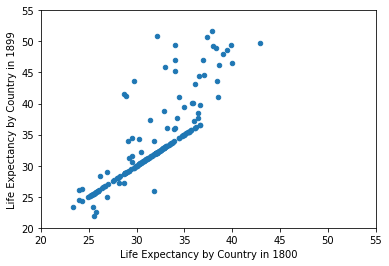

In [9]:
%matplotlib inline
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
gapminder.plot(kind="scatter", x="1800", y="1899")

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

Excellent work! As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

## 3. Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

- `'Life expectancy'` is the first column (index 0) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to `0`.
- There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [10]:
life_expectancy = gapminder["Life expectancy"]
gapminder.drop(columns = "Life expectancy", inplace=True)
gapminder.insert(0, "Life expectancy", life_expectancy)

In [11]:
gapminder.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [13]:
# Check whether the first column is 'Life expectancy'
assert gapminder.columns[0] == "Life expectancy"

In [14]:
# Check whether the values in the row are valid
assert gapminder.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [15]:
# Check that there is only one instance of each country
assert gapminder['Life expectancy'].value_counts()[0] == 1

AssertionError: 

Fantastic! Getting into the habit of testing your code like this is an important skill.

## 4. Assembling your data
Create separate dataframes using the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Then, concatenate them into a single DataFrame called `gapminder_concat`. This is a row-wise concatenation.

In [16]:
g1800 = gapminder.filter(regex=("18\d{2}"))
g1800.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [17]:
g1900 = gapminder.filter(regex=("19\d{2}"))
g1900.head()

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
g2000 = gapminder.filter(regex=("2\d{3}"))
g2000.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Concatenate the DataFrames row-wise
gapminder_concat = pd.concat([g1800, g1900, g2000], axis=0, sort=True)

# Print the shape of gapminder_concat
gapminder_concat.shape

(2340, 217)

In [41]:
# Print the head of gapminder_concat
gapminder_concat.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Great work! All the Gapminder data, from 1800 to 2016, is now contained in one DataFrame.

## 5. Reshaping your data
Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the `gapminder` DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [21]:
# Melt gapminder: gapminder_melt
gapminder_melt = gapminder.melt(id_vars=["Life expectancy"])
gapminder_melt.head()

,Life expectancy,variable,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [22]:
# Rename the columns
gapminder_melt.columns = ["country", "year", "life_expectancy"]

# Print the head of gapminder_melt
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [23]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


Well done! Having the data in this tidy format will make subsequent analysis far easier.

## 6. Checking the data types
Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type `object`, year is of type `int64`, and life_expectancy is of type `float64`.

Notice that the column `'year'` is of type object. This is incorrect, so you'll need to use the `pd.to_numeric()` function to convert it to a numeric data type.

In [24]:
import numpy as np

# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

In [25]:
# Test if year is of type int64
assert gapminder_melt.year.dtype == np.int64

In [26]:
# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtype == np.float64

Excellent work! Since the assert statements did not throw any errors, you can be sure that your columns have the correct data types!

## 7. Looking at country spellings
Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the `'country'` column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

- The set of lower and upper case letters.
- Whitespace between words.
- Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - `str.contains()` - which takes a regular expression pattern, and applies it to the `Series`, returning `True` if there is a match, and `False` otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using `~`. This Boolean series can then be used to get the `Series` of countries that have invalid names.

In [27]:
# Create the series of countries: countries
countries = gapminder_melt.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()
countries.head()

0                 Abkhazia
1              Afghanistan
2    Akrotiri and Dhekelia
3                  Albania
4                  Algeria
Name: country, dtype: object

Write a regular expression that tests your assumptions of what characters belong in countries:
Anchor the pattern to match exactly what you want by placing a `^` in the beginning and `$` in the end.
Use `A-Za-z` to match the set of lower and upper case letters, `\.` to match periods, and `\s` to match whitespace between word

In [31]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)
mask.tail()

255     True
256     True
257     True
258    False
259     True
Name: country, dtype: bool

In [29]:
# Invert the mask: mask_inverse
mask_inverse = ~mask
mask_inverse.tail()

255    False
256    False
257    False
258     True
259    False
Name: country, dtype: bool

In [30]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
invalid_countries

49              Congo, Dem. Rep.
50                   Congo, Rep.
53                 Cote d'Ivoire
73        Falkland Is (Malvinas)
93                 Guinea-Bissau
98              Hong Kong, China
118    United Korea (former)\r\n
131                 Macao, China
132               Macedonia, FYR
145        Micronesia, Fed. Sts.
161              Ngorno-Karabakh
187               St. Barthélemy
193       St.-Pierre-et-Miquelon
225                  Timor-Leste
251        Virgin Islands (U.S.)
252         North Yemen (former)
253         South Yemen (former)
258                        Åland
Name: country, dtype: object

Excellent work! As you can see, not all these country names are actually invalid so maybe the assumptions need to be tweaked a little. However, there certainly are a few cases worth further investigation, such as `St. Barth?lemy`. Whenever you are dealing with columns of raw data consisting of strings, it is important to check them for consistency like this.

## 8. More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. 

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

Practice dropping the missing values. Drop all the rows that have `NaN` in the `life_expectancy` column. Before doing so, it would be valuable to use `assert` statements to confirm that year and country do not have any missing values.

Begin by printing the shape of `gapminder` prior to dropping the missing values. Find out what its shape will be after dropping the missing values!

Assert that country and year do not contain any missing values. Note the chaining of the `.all()` method to `pd.notnull()` to confirm that all values in the column are not null.

Drop the rows in the data where any observation in `life_expectancy` is missing. When you confirmed that country and year don't have missing values, you can use the `.dropna()` method on the entire `gapminder_melt` DataFrame, because any missing values would have to be in the `life_expectancy` column. 

The `.dropna()` method has the default keyword arguments `axis=0` and `how='any'`, which specify that rows with any missing values should be dropped.

In [68]:
gapminder_melt.head()

,country,year,life_expectancy
1,Afghanistan,1800,28.21
3,Albania,1800,35.40
4,Algeria,1800,28.82
7,Angola,1800,26.98
9,Antigua and Barbuda,1800,33.54


In [69]:
gapminder_melt.tail()

,country,year,life_expectancy
169251,Virgin Islands (U.S.),2016,80.82
169254,Yemen,2016,64.92
169256,Zambia,2016,57.10
169257,Zimbabwe,2016,61.69
169259,South Sudan,2016,56.10


In [43]:
gapminder_melt.shape

(169260, 3)

In [44]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

In [45]:
# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

In [48]:
# Drop the missing values
gapminder_melt = gapminder_melt.dropna(how="any")

# Print the shape of gapminder_melt
print(gapminder_melt.shape)

(43857, 3)


Great work! After dropping the missing values from `'life_expectancy'`, the number of rows in the DataFrame has gone down from `169260` to `43857`. In general, you should avoid dropping too much of your data, but if there is no reasonable way to fill in or impute missing values, then dropping the missing data may be the best solution.

## 9. Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. Begin by creating a histogram of the `life_expectancy` column. You should not get any values under `0` and you should see something reasonable on the higher end of the `life_expectancy` age range.

Next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the `life_expectancy` column from each subset, and take an average of the values. You can achieve this using the `.groupby()` method. 

Finally, save your tidy and summarized DataFrame to a file using the `.to_csv()` method.

In [66]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

In [67]:
# Print the head of gapminder_agg
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

In [58]:
# Print the tail of gapminder_agg
gapminder_agg.tail()

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64

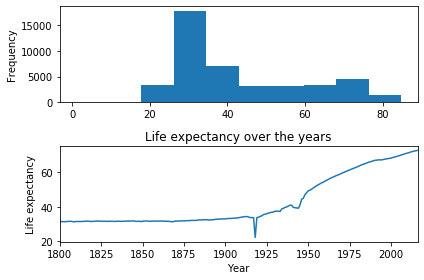

In [55]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind="hist")

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [63]:
# Save both DataFrames to csv files
gapminder_melt.to_csv("output/gapminder.csv", header=True, index=False)
gapminder_agg.to_csv("output/gapminder_agg.csv", header=True)

Amazing work! You've stepped through each stage of the data cleaning process and your data is now ready for serious analysis! Looking at the line plot, it seems like life expectancy has, as expected, increased over the years. There is a surprising dip around 1920 that may be worth further investigation!